# FML Homework 2 - Erin Choi

## Data cleaning

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score
import warnings

In [2]:
# load data
data = pd.read_csv('techSalaries2017.csv')
data.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,Oracle,Product Manager,"Redwood City, CA",127000,107000,20000.0,10000.0,1.5,1.5,NaN,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,eBay,Software Engineer,"San Francisco, CA",100000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,Amazon,Product Manager,"Seattle, WA",310000,155000,0.0,0.0,8.0,0.0,NaN,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000,157000,180000.0,35000.0,7.0,5.0,NaN,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,Microsoft,Software Engineer,"Mountain View, CA",157000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91


In [3]:
# how many rows are in the data?
data.shape

(62642, 27)

In [4]:
# which columns have null values?
data.isnull().sum()

company                        5
title                          0
location                       0
totalyearlycompensation        0
basesalary                     0
stockgrantvalue                0
bonus                          0
yearsofexperience              0
yearsatcompany                 0
gender                     19540
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
Age                            0
Height                         0
Zodiac                         0
SAT                            0
GPA                            0
dtype: int64

In [5]:
# checking unique values for each column: there's something weird in the gender column
data['gender'].value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [6]:
# change the weird gender value to null value
data.loc[(data['gender']=='Title: Senior Software Engineer', 'gender')] = np.nan
# data.iloc[11010]
data['gender'].isnull().sum()

19541

In [7]:
# to restrict to data that provides race/education information,
# drop rows with NA for race and/or education
# drop rows with no gender information as well
data.dropna(subset=['Race', 'Education', 'gender'], inplace=True)
data.shape

(21591, 27)

In [8]:
# drop race and education columns
data.drop(columns=['Education', 'Race'], inplace=True)
# reset index
data.reset_index(drop=True, inplace=True)
data.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Age,Height,Zodiac,SAT,GPA
0,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,1,0,0,0,0,45,68.891,9,1166,3.04
1,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,0,0,1,0,0,24,61.454,12,1175,3.07
2,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,1,0,0,0,0,25,65.455,1,1268,3.34
3,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,1,0,0,0,0,32,73.769,8,1070,2.75
4,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,0,1,0,0,0,29,68.710,2,1187,3.23


In [9]:
# encode the gender column into numerical data using one-hot encoding
gendercol = pd.DataFrame(data['gender'])
ohe = OneHotEncoder()
gender_1hot = ohe.fit_transform(gendercol)
gender_df = pd.DataFrame(gender_1hot.toarray(), columns=['female','male','other'])
gender_df.value_counts()

female  male  other
0.0     1.0   0.0      17605
1.0     0.0   0.0       3880
0.0     0.0   1.0        106
dtype: int64

In [10]:
# add encoded columns back into the dataset
data['male'] = gender_df['male']
data['female'] = gender_df['female']
data['other_gender'] = gender_df['other']
# later, don't include "other" column in the model to avoid overdetermination
data.tail()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Black,Race_Hispanic,Age,Height,Zodiac,SAT,GPA,male,female,other_gender
21586,Facebook,Software Engineering Manager,"Menlo Park, CA",1470000,290000,1100.0,80000.0,9.0,7.0,Male,...,0,0,31,68.402,12,1436,3.77,1.0,0.0,0.0
21587,Google,Product Manager,"San Francisco, CA",4500000,450000,3700.0,350000.0,20.0,14.0,Male,...,0,0,57,69.195,6,1363,3.50,1.0,0.0,0.0
21588,Zapier,Software Engineering Manager,"Denver, CO",1605000,250000,1305.0,50000.0,16.0,2.0,Female,...,0,0,55,66.902,11,1447,3.77,0.0,1.0,0.0
21589,Facebook,Software Engineering Manager,"Menlo Park, CA",2372000,315000,1933.0,124000.0,22.0,2.0,Male,...,1,0,50,62.691,8,1513,3.85,1.0,0.0,0.0
21590,Facebook,Product Manager,"Menlo Park, CA",4980000,380000,4400.0,200000.0,17.0,0.0,Male,...,0,0,49,65.138,2,1362,3.48,1.0,0.0,0.0


In [11]:
# drop gender column now
data.drop(columns=['gender'], inplace=True)
data.shape

(21591, 27)

In [12]:
# do the same with Zodiac as well - one hot encoding
zodiac_names = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 
                'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
zodiaccol = pd.DataFrame(data['Zodiac'])

ohe = OneHotEncoder()
zodiac_1hot = ohe.fit_transform(zodiaccol)
zodiac_df = pd.DataFrame(zodiac_1hot.toarray(), columns=zodiac_names)
zodiac_df.value_counts()

aries  taurus  gemini  cancer  leo  virgo  libra  scorpio  sagittarius  capricorn  aquarius  pisces
0.0    0.0     0.0     0.0     0.0  1.0    0.0    0.0      0.0          0.0        0.0       0.0       1843
1.0    0.0     0.0     0.0     0.0  0.0    0.0    0.0      0.0          0.0        0.0       0.0       1836
0.0    0.0     0.0     0.0     0.0  0.0    1.0    0.0      0.0          0.0        0.0       0.0       1829
               1.0     0.0     0.0  0.0    0.0    0.0      0.0          0.0        0.0       0.0       1816
               0.0     0.0     0.0  0.0    0.0    0.0      0.0          0.0        0.0       1.0       1808
                                                           1.0          0.0        0.0       0.0       1807
                       1.0     0.0  0.0    0.0    0.0      0.0          0.0        0.0       0.0       1800
                       0.0     1.0  0.0    0.0    0.0      0.0          0.0        0.0       0.0       1788
       1.0     0.0     0.0     0.0  

In [13]:
# add columns back
for name in zodiac_names:
    data[name] = zodiac_df[name]
# later, don't include one of these columns in the model to avoid overdetermination
data.tail()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,Masters_Degree,...,gemini,cancer,leo,virgo,libra,scorpio,sagittarius,capricorn,aquarius,pisces
21586,Facebook,Software Engineering Manager,"Menlo Park, CA",1470000,290000,1100.0,80000.0,9.0,7.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21587,Google,Product Manager,"San Francisco, CA",4500000,450000,3700.0,350000.0,20.0,14.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21588,Zapier,Software Engineering Manager,"Denver, CO",1605000,250000,1305.0,50000.0,16.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21589,Facebook,Software Engineering Manager,"Menlo Park, CA",2372000,315000,1933.0,124000.0,22.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21590,Facebook,Product Manager,"Menlo Park, CA",4980000,380000,4400.0,200000.0,17.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# drop zodiac column now
data.drop(columns=['Zodiac'], inplace=True)
data.shape

(21591, 38)

In [15]:
# Standardize the numerical columns
scale_cols = ['totalyearlycompensation', 'basesalary', 'stockgrantvalue',
              'bonus', 'yearsofexperience', 'yearsatcompany', 'Age', 'Height',
              'SAT', 'GPA']
data_scaling = data.copy()
data_scaled = data.copy()
data_scaled.drop(columns=scale_cols, inplace=True)
data_scaled.head()

,company,title,location,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,...,gemini,cancer,leo,virgo,libra,scorpio,sagittarius,capricorn,aquarius,pisces
0,Google,Software Engineer,"Sunnyvale, CA",0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Microsoft,Software Engineer,"Redmond, WA",0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Google,Software Engineer,"San Bruno, CA",0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Microsoft,Software Engineer,"Seattle, WA",1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Blend,Software Engineer,"San Francisco, CA",0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Use standard scaler to standardize the selected features
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(data_scaling[scale_cols]) 
scaled_df = pd.DataFrame(scaled_cols, columns=scale_cols)
scaled_df.head()

,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,Age,Height,SAT,GPA
0,1.518933,1.330754,1.381814,1.059895,-0.362911,0.690758,0.845917,0.630969,0.798871,0.493157
1,-0.464693,-0.172378,-0.605816,-0.295624,-0.704951,-0.211545,-1.419175,-1.845165,0.875509,0.600926
2,1.045568,0.753971,1.105754,0.701081,-0.191891,0.991526,-1.311314,-0.513040,1.667436,1.570849
3,0.181488,0.526753,-0.095106,0.063190,-0.533931,0.389991,-0.556283,2.255089,-0.018602,-0.548613
4,-0.081492,0.544232,-0.315954,-0.734174,-0.362911,-0.813080,-0.879868,0.570705,0.977693,1.175695


In [17]:
# Add scaled columns back to dataset
data_scaled = pd.concat([scaled_df, data_scaled], axis=1)
data_scaled.head()

,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,Age,Height,SAT,GPA,...,gemini,cancer,leo,virgo,libra,scorpio,sagittarius,capricorn,aquarius,pisces
0,1.518933,1.330754,1.381814,1.059895,-0.362911,0.690758,0.845917,0.630969,0.798871,0.493157,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.464693,-0.172378,-0.605816,-0.295624,-0.704951,-0.211545,-1.419175,-1.845165,0.875509,0.600926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.045568,0.753971,1.105754,0.701081,-0.191891,0.991526,-1.311314,-0.513040,1.667436,1.570849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181488,0.526753,-0.095106,0.063190,-0.533931,0.389991,-0.556283,2.255089,-0.018602,-0.548613,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.081492,0.544232,-0.315954,-0.734174,-0.362911,-0.813080,-0.879868,0.570705,0.977693,1.175695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 1
Using multiple linear regression: What is the best predictor of total annual
compensation, how much variance is explained by this predictor vs. the full multiple
regression model?

In [18]:
# create a new dataset, dropping qualitative & too predictive variables from the scaled dataset
data_q1 = data_scaled.copy()
data_q1.drop(columns=['company', 'title', 'location', 'basesalary', 'stockgrantvalue', 'bonus'], inplace=True)
data_q1.shape

(21591, 32)

In [19]:
# find the best predictor of total annual compensation
corrmat = data_q1.corr()['totalyearlycompensation'].sort_values(ascending = False)
print(corrmat[1:5],'\n',(corrmat[-4:]))

yearsofexperience    0.402683
SAT                  0.332690
GPA                  0.305322
Age                  0.254491
Name: totalyearlycompensation, dtype: float64 
 Race_Black         -0.022499
Race_Asian         -0.037028
female             -0.039120
Bachelors_Degree   -0.154913
Name: totalyearlycompensation, dtype: float64


Years of experience is the best single predictor of total annual compensation, since its correlation with the outcome variable is the greatest; the correlation value by years of experience has the highest magnitude (0.403) besides the correlation of the outcome variable with itself. It makes sense that this is a good predictor - people with more professional experience generally get paid more since more time spent doing a certain kind of work leads to greater expertise in that work/field.

In [20]:
# drop some dummy variables to prevent overdetermination - 
# for education, race, gender, zodiac features
data_q1.drop(columns=['Highschool', 'Race_Two_Or_More', 'other_gender', 'gemini'], inplace=True)

# separate the totalyearlycompensation column from predictor variables
data_q1_x = data_q1.drop(columns=['totalyearlycompensation'])
data_q1_y = data_q1['totalyearlycompensation']

In [21]:
# split data into train/test sets
xTrain, xTest, yTrain, yTest = train_test_split(data_q1_x, data_q1_y, test_size=0.2, random_state=17)
#print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(17272, 27) (4319, 27) (17272,) (4319,)


In [22]:
# simple linear regression with years of experience as single predictor
model_exp = LinearRegression().fit(pd.DataFrame(xTrain['yearsofexperience']), yTrain)
yPred1 = model_exp.predict(pd.DataFrame(xTest['yearsofexperience']))

print("R^2 of model using Years of Experience: %.4f" % model_exp.score(pd.DataFrame(xTest['yearsofexperience']), yTest))
print("RMSE of model using Years of Experience: %.4f" % np.sqrt(mean_squared_error(yTest, yPred1)))

R^2 of model using Years of Experience: 0.1725
RMSE of model using Years of Experience: 0.8565


In [23]:
# multiple regression with all predictors
model_multi = LinearRegression().fit(xTrain, yTrain)
yPred2 = model_multi.predict(xTest)

print("R^2 of multiple regression model: %.4f" % model_multi.score(xTest, yTest))
print("RMSE of multiple regression model: %.4f" %np.sqrt(mean_squared_error(yTest, yPred2)))

R^2 of multiple regression model: 0.2958
RMSE of multiple regression model: 0.7901


After training each model on a training set and applying each on the test set, the single-predictor linear model using years of experience yielded an R^2 of 0.173, meaning about 17.3% of the variance in the outcome (total annual compensation) can be explained by years of experience. Meanwhile, the multiple regression model using all predictors (excluding those left out to prevent overdetermination) produced an R^2 of 0.296, meaning about 29.6% of variance in the outcome could be explained by the combination of the predictors in the full multiple regression model.

In [24]:
print("Weight of Years of Experience in linear regression model:", model_exp.coef_)
print("Weight of Years of Experience in multiple regression model:", model_multi.coef_[0])

Weight of Years of Experience in linear regression model: [0.40716367]
Weight of Years of Experience in multiple regression model: 0.39048027885991526


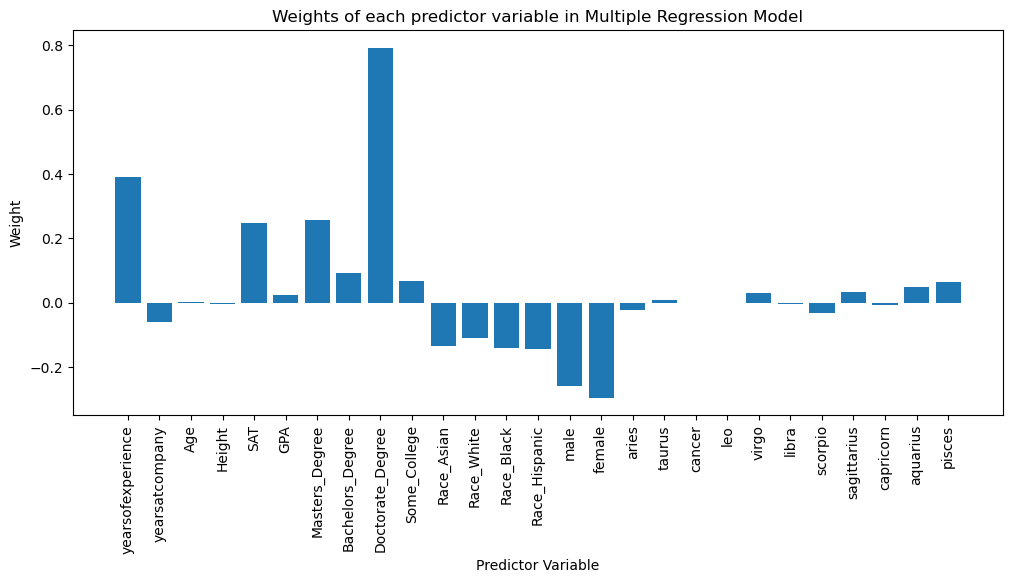

In [27]:
# plot the weights of the features in the multiple regression model
fig = plt.figure(figsize = (12, 5))
plt.bar(xTrain.columns, model_multi.coef_);
plt.xticks(rotation='vertical')
plt.xlabel("Predictor Variable")
plt.ylabel("Weight")
plt.title("Weights of each predictor variable in Multiple Regression Model");
# plt.tight_layout()
plt.show()

## Question 2
Using ridge regression to do the same as in 1): How does the model change or improve
compared to OLS? What is the optimal lambda?

In [28]:
# define ridge model and grid
ridge_model = Ridge()
grid = dict()
grid['alpha'] = np.arange(0, 20, 0.01)

# perform grid search
search = GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
results = search.fit(xTrain, yTrain)

# what's the optimal lambda?
print('Ridge Optimal Lambda: %.2f' % results.best_params_['alpha'])

Ridge Optimal Lambda: 5.87


In [29]:
# find the RMSE using the ridge model with the optimal lambda
ridge_final = results.best_estimator_
ridge_pred = ridge_final.predict(xTest)
ridge_rmse = np.sqrt(mean_squared_error(yTest, ridge_pred)) 
print("Ridge Model RMSE: %.4f" % ridge_rmse)

# find the R^2
print("Ridge Model R^2: %.4f" % ridge_final.score(xTest, yTest))

Ridge Model RMSE: 0.7900
Ridge Model R^2: 0.2959


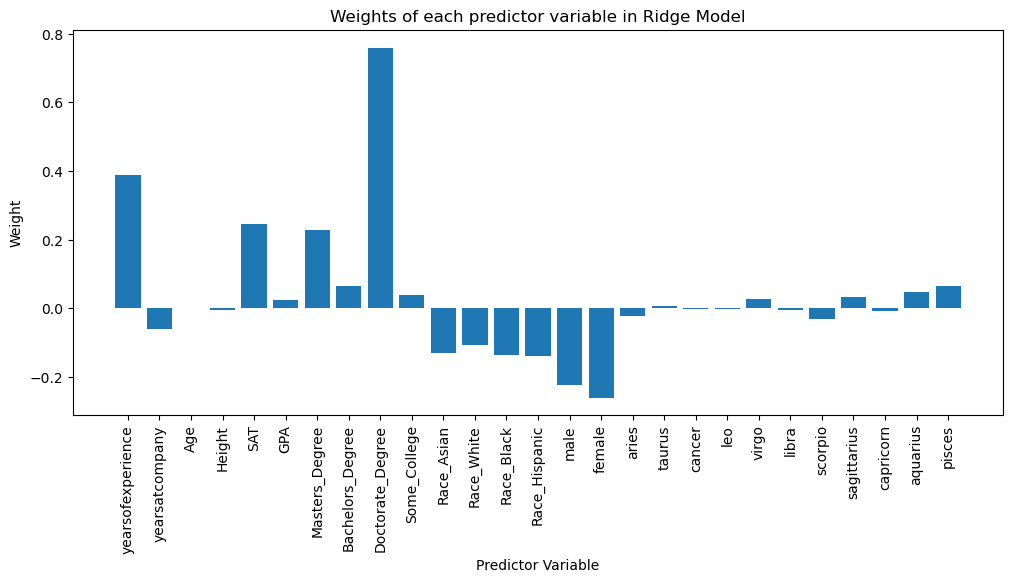

In [30]:
# plot the weights of the features in the ridge model
fig = plt.figure(figsize = (12, 5))
plt.bar(xTrain.columns, ridge_final.coef_);
plt.xticks(rotation='vertical')
plt.xlabel("Predictor Variable")
plt.ylabel("Weight")
plt.title("Weights of each predictor variable in Ridge Model");
# plt.tight_layout()
plt.show()

## Question 3
Using Lasso regression to do the same as in 1): How does the model change now? How
many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

In [31]:
warnings.filterwarnings('ignore') 

# define model and grid
lasso_model = Lasso()
grid = dict()
grid['alpha'] = np.arange(0,20,1)

# perform grid search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
results_lasso = search.fit(xTrain, yTrain)

# what's the optimal lambda?
print('Lasso Optimal Lambda: %.2f' % results_lasso.best_params_['alpha'])

Lasso Optimal Lambda: 0.00


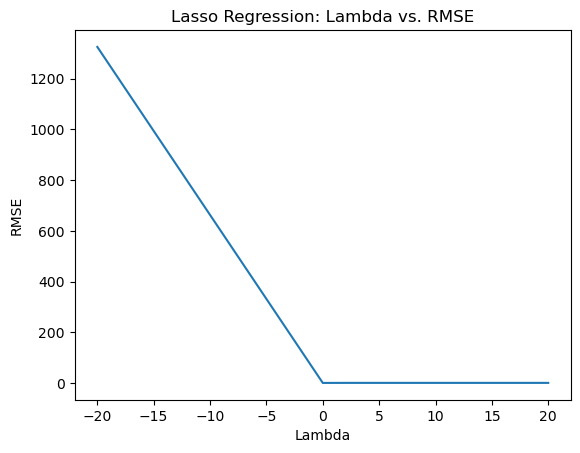

Optimal lambda: 0.0


In [32]:
# try using a different method (sklearn implementation) 
# to graph the RMSE over different lambdas

lambdas = np.linspace(-20,20,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    ridgeModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

# plot lambda vs RMSE
plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso Regression: Lambda vs. RMSE')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

In [33]:
# find the RMSE using the lasso model with the optimal lambda
lasso_final = results_lasso.best_estimator_
lasso_pred = lasso_final.predict(xTest)
lasso_rmse = np.sqrt(mean_squared_error(yTest, lasso_pred)) 
print("Lasso Model RMSE: %.4f" % lasso_rmse)

# find the R^2
print("Lasso Model R^2: %.4f" % lasso_final.score(xTest, yTest))

Lasso Model RMSE: 0.7901
Lasso Model R^2: 0.2958


In [34]:
# verify no betas have shrunk to zero
(lasso_final.coef_==0).sum()

0

lambda=0 means the lasso model is no different from OLS (multiple regression model), and none of the betas have shrunk to 0

## Question 4
There is controversy as to the existence of a male/female gender pay gap in tech job
compensation. Build a logistic regression model (with gender as the outcome variable)
to see if there is an appreciable beta associated with total annual compensation with
and without controlling for other factors.

In [35]:
# create new dataset, dropping units with "other" as gender
# still not using variables 5-7 due to multicollinearity concerns
data_q4 = data_q1.copy()
data_q4.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,Age,Height,SAT,GPA,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,taurus,cancer,leo,virgo,libra,scorpio,sagittarius,capricorn,aquarius,pisces
0,1.518933,-0.362911,0.690758,0.845917,0.630969,0.798871,0.493157,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.464693,-0.704951,-0.211545,-1.419175,-1.845165,0.875509,0.600926,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.045568,-0.191891,0.991526,-1.311314,-0.513040,1.667436,1.570849,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181488,-0.533931,0.389991,-0.556283,2.255089,-0.018602,-0.548613,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.081492,-0.362911,-0.813080,-0.879868,0.570705,0.977693,1.175695,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
data_q4.shape

(21591, 28)

In [37]:
# drop units with "other" as gender, there should be 106 rows removed
other_index = data_q4[(data_q4['male']==0) & (data_q4['female']==0)].index
data_q4.drop(other_index, inplace=True)
data_q4.shape

(21485, 28)

In [38]:
# drop the female column, use the male column as gender column
# male = 1, female = 0
data_q4.drop(columns=['female'], inplace=True)
data_q4.rename(columns={"male": "gender"}, inplace=True)
data_q4.shape

(21485, 27)

In [39]:
# reset the index
data_q4.reset_index(drop=True, inplace=True)
data_q4.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,Age,Height,SAT,GPA,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,taurus,cancer,leo,virgo,libra,scorpio,sagittarius,capricorn,aquarius,pisces
0,1.518933,-0.362911,0.690758,0.845917,0.630969,0.798871,0.493157,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.464693,-0.704951,-0.211545,-1.419175,-1.845165,0.875509,0.600926,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.045568,-0.191891,0.991526,-1.311314,-0.513040,1.667436,1.570849,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181488,-0.533931,0.389991,-0.556283,2.255089,-0.018602,-0.548613,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.081492,-0.362911,-0.813080,-0.879868,0.570705,0.977693,1.175695,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# are the classes balanced? not at all
data_q4['gender'].value_counts()

1.0    17605
0.0     3880
Name: gender, dtype: int64

In [41]:
# separate the gender column from predictor variables
data_q4_x = data_q4.drop(columns=['gender'])
data_q4_y = data_q4['gender']

In [42]:
# split data into train/test sets
# use StratifiedShuffleSplit this time to make sure both sets have the same proportion of males to females
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=17)
for train_index, test_index in split.split(data_q4_x, data_q4_y):
    xTrainG = data_q4_x.loc[train_index]
    yTrainG = data_q4_y.loc[train_index]
    xTestG = data_q4_x.loc[test_index]
    yTestG = data_q4_y.loc[test_index]
    
#print(xTrainG.shape, xTestG.shape, yTrainG.shape, yTestG.shape)

(17188, 26) (4297, 26) (17188,) (4297,)


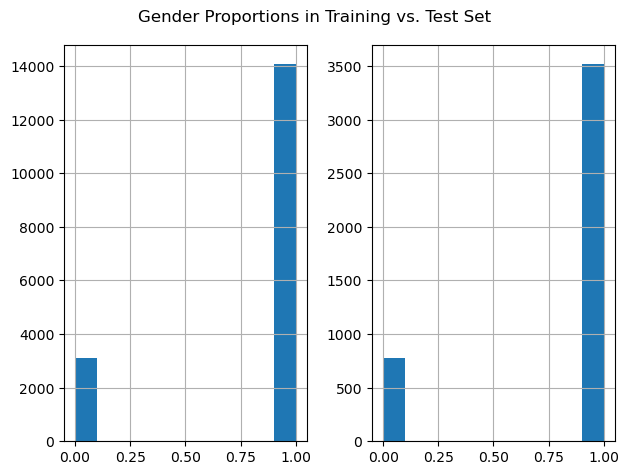

In [43]:
# check that the class proportions are the same in both sets
fig, axes = plt.subplots(1, 2)
yTrainG.hist(ax=axes[0]);
yTestG.hist(ax=axes[1]);
fig.suptitle("Gender Proportions in Training vs. Test Set")
plt.tight_layout()
plt.show()

In [44]:
# logistic regression with totalyearlycompensation as only predictor
log_1 = LogisticRegression(class_weight='balanced').fit(pd.DataFrame(xTrainG['totalyearlycompensation']), 
                                                        yTrainG.values.flatten());
yPredLog1 = log_1.predict(pd.DataFrame(xTestG['totalyearlycompensation']))

print("R^2 of logistic model using Total Yearly Compensation: %.4f" % log_1.score(pd.DataFrame(xTestG['totalyearlycompensation']), yTestG))
print("RMSE of logistic model using Total Yearly Compensation: %.4f" % np.sqrt(mean_squared_error(yTestG, yPredLog1)))
print("Beta of Total Yearly Compensation in logistic model: %.4f" % log_1.coef_[0])

R^2 of logistic model using Total Yearly Compensation: 0.4445
RMSE of logistic model using Total Yearly Compensation: 0.7453
Beta of Total Yearly Compensation in logistic model: 0.1417


In [45]:
# additional evaluation metrics
print("More metrics for Total Yearly Compensation logistic model:")
# confusion matrix
print("Confusion matrix:\n", confusion_matrix(yTestG, yPredLog1))
      
# accuracy score: (tp+tn)/all
acc = accuracy_score(yTestG, yPredLog1)
print("Accuracy = {:0.2f}%".format(acc * 100))

# precision score: tp/positive predictions = tp/(tp+fp), PPV
prec = precision_score(yTestG, yPredLog1)
print("Precision = {:0.2f}%".format(100 * prec))

# recall score: tp/ap = tp/(tn+fp)
recall = recall_score(yTestG, yPredLog1)
print("Recall = {:0.2f}%".format(100 * recall))

More metrics for Total Yearly Compensation logistic model:
Confusion matrix:
 [[ 454  322]
 [2065 1456]]
Accuracy = 44.45%
Precision = 81.89%
Recall = 41.35%


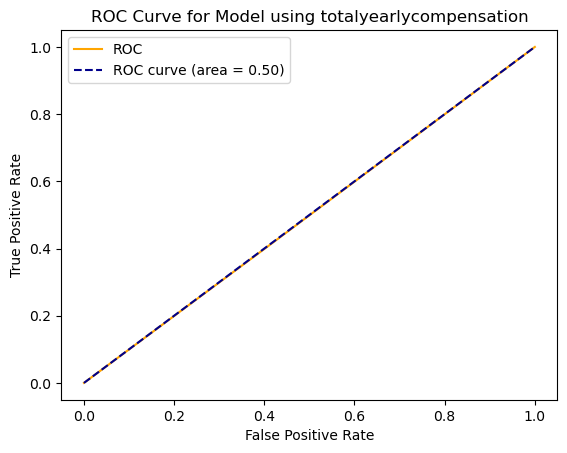

In [85]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(yTestG, yPredLog1)
auc = metrics.roc_auc_score(yTestG, yPredLog1)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model using totalyearlycompensation')
plt.legend()
plt.show()

In [47]:
# logistic regression controlling for all factors
log_2 = LogisticRegression(class_weight='balanced').fit(xTrainG, yTrainG.values.flatten());
yPredLog2 = log_2.predict(xTestG)

print("R^2 of full logistic model: %.4f" % log_2.score(xTestG, yTestG))
print("RMSE of full logistic model: %.4f" % np.sqrt(mean_squared_error(yTestG, yPredLog2)))
print("Beta of Total Yearly Compensation in full logistic model: %.4f" % log_2.coef_.flatten()[0])

R^2 of full logistic model: 0.5083
RMSE of full logistic model: 0.7012
Beta of Total Yearly Compensation in full logistic model: 0.0887


In [48]:
# additional evaluation metrics
print("More metrics for full logistic regression model:")

# confusion matrix
print("Confusion matrix:\n", confusion_matrix(yTestG, yPredLog2))
      
# accuracy score: (tp+tn)/all
acc = accuracy_score(yTestG, yPredLog2)
print("Accuracy = {:0.2f}%".format(acc * 100))

# precision score: tp/positive predictions = tp/(tp+fp), PPV
prec = precision_score(yTestG, yPredLog2)
print("Precision = {:0.2f}%".format(100 * prec))

# recall score: tp/ap = tp/(tn+fp)
recall = recall_score(yTestG, yPredLog2)
print("Recall = {:0.2f}%".format(100 * recall))

More metrics for full logistic regression model:
Confusion matrix:
 [[ 467  309]
 [1804 1717]]
Accuracy = 50.83%
Precision = 84.75%
Recall = 48.76%


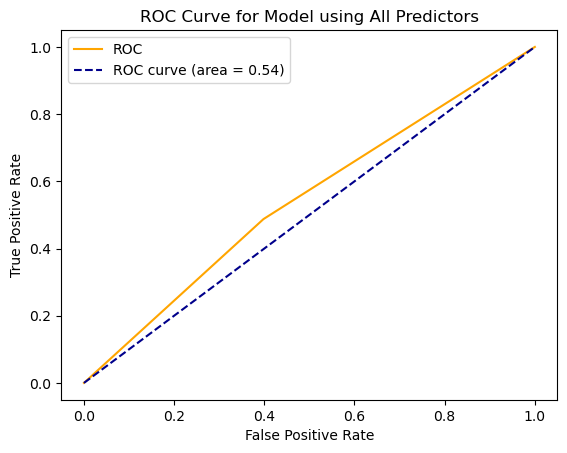

In [86]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(yTestG, yPredLog2)
auc = metrics.roc_auc_score(yTestG, yPredLog2)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model using All Predictors')
plt.legend()
plt.show()

## Question 5
Build a logistic regression model to see if you can predict high and low pay from years
of relevant experience, age, height, SAT score and GPA, respectively.

In [50]:
# reload original data
origdata = pd.read_csv('techSalaries2017.csv')

In [51]:
# keep only relevant columns
q5_cols = ['yearsofexperience', 'Age', 'Height', 'SAT', 'GPA', 'basesalary']
data_q5 = origdata[q5_cols] 
data_q5.head()

,yearsofexperience,Age,Height,SAT,GPA,basesalary
0,1.5,38,68.590,829,2.13,107000
1,5.0,34,68.059,993,2.77,0
2,8.0,42,61.343,1200,3.26,155000
3,7.0,28,66.495,1170,3.07,157000
4,5.0,34,69.015,1115,2.91,0


In [52]:
# create new outcome variable: highearner
# 1 = makes more than median annual salary, 0 = makes less than median annual salary
data_q5["highearner"] = (data_q5['basesalary']>data_q5['basesalary'].quantile()).replace({True:1, False:0})
data_q5.head()

,yearsofexperience,Age,Height,SAT,GPA,basesalary,highearner
0,1.5,38,68.590,829,2.13,107000,0
1,5.0,34,68.059,993,2.77,0,0
2,8.0,42,61.343,1200,3.26,155000,1
3,7.0,28,66.495,1170,3.07,157000,1
4,5.0,34,69.015,1115,2.91,0,0


In [53]:
# drop basesalary
data_q5.drop(columns=['basesalary'], inplace=True)
data_q5.head()

,yearsofexperience,Age,Height,SAT,GPA,highearner
0,1.5,38,68.590,829,2.13,0
1,5.0,34,68.059,993,2.77,0
2,8.0,42,61.343,1200,3.26,1
3,7.0,28,66.495,1170,3.07,1
4,5.0,34,69.015,1115,2.91,0


In [54]:
# separate predictors and target variables
data_q5_x = data_q5.drop(columns=['highearner'])
data_q5_y = data_q5['highearner']

In [55]:
# standardize the predictors
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(data_q5_x) 
data_q5_x = pd.DataFrame(scaled_cols, columns=data_q5_x.columns)
data_q5_x.head()

,yearsofexperience,Age,Height,SAT,GPA
0,-0.976680,0.083307,0.533047,-2.117992,-2.827954
1,-0.377399,-0.348521,0.355843,-0.722949,-0.523381
2,0.136271,0.515135,-1.885403,1.037868,1.241058
3,-0.034953,-0.996262,-0.166091,0.782677,0.556888
4,-0.377399,-0.348521,0.674877,0.314827,-0.019255


In [56]:
# split data into train/test sets
xTrain5, xTest5, yTrain5, yTest5 = train_test_split(data_q5_x, data_q5_y, test_size=0.2, random_state=17)
print(xTrain5.shape, xTest5.shape, yTrain5.shape, yTest5.shape)

(50113, 5) (12529, 5) (50113,) (12529,)


In [57]:
# logistic regression model predicting high or low pay
pay_model = LogisticRegression().fit(xTrain5, yTrain5.values.flatten());
yPredPay = pay_model.predict(xTest5)

print("R^2 of model: %.4f" % pay_model.score(xTest5, yTest5))
print("RMSE of model: %.4f" % np.sqrt(mean_squared_error(yTest5, yPredPay)))

R^2 of model: 0.6926
RMSE of model: 0.5544


In [58]:
# additional evaluation metrics
print("More metrics for original logistic regression model:")

# confusion matrix
print("Confusion matrix:\n", confusion_matrix(yTest5, yPredPay))
      
# accuracy score: (tp+tn)/all
acc = accuracy_score(yTest5, yPredPay)
print("Accuracy = {:0.2f}%".format(acc * 100))

# precision score: tp/positive predictions = tp/(tp+fp), PPV
prec = precision_score(yTest5, yPredPay)
print("Precision = {:0.2f}%".format(100 * prec))

# recall score: tp/ap = tp/(tn+fp)
recall = recall_score(yTest5, yPredPay)
print("Recall = {:0.2f}%".format(100 * recall))

# AUROC
auroc = roc_auc_score(yTest5, yPredPay)
print("AUROC = {:0.2f}".format(auroc))

More metrics for original logistic regression model:
Confusion matrix:
 [[4991 1530]
 [2321 3687]]
Accuracy = 69.26%
Precision = 70.67%
Recall = 61.37%
AUROC = 0.69


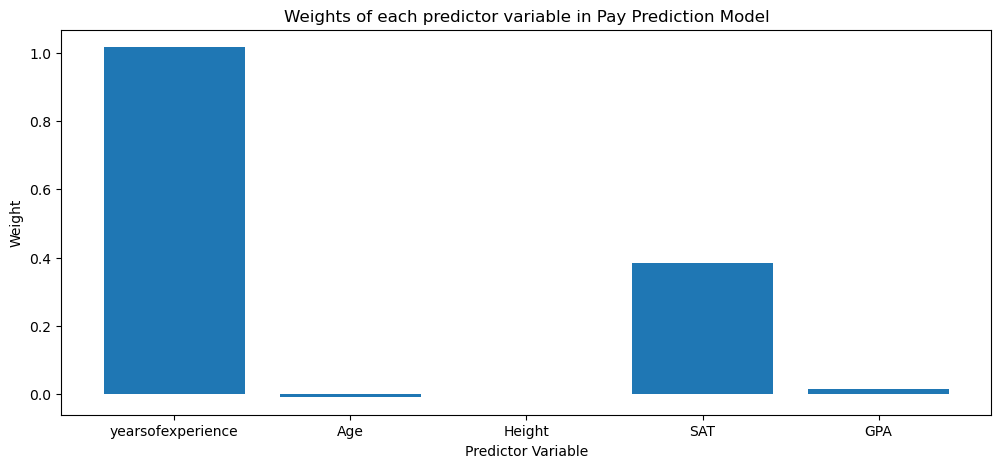

In [59]:
# plot the weights of the features in the model
fig = plt.figure(figsize = (12, 5))
plt.bar(xTrain5.columns, pay_model.coef_[0]);
# plt.xticks(rotation='vertical')
plt.xlabel("Predictor Variable")
plt.ylabel("Weight")
plt.title("Weights of each predictor variable in Pay Prediction Model");
# plt.tight_layout()
plt.show()

In [60]:
# try building model with just yearsofexperience and SAT this time
pay_model2 = LogisticRegression().fit(pd.DataFrame(xTrain5[['yearsofexperience', 'SAT']]), 
                                      yTrain5.values.flatten());
yPredPay2 = pay_model2.predict(pd.DataFrame(xTest5[['yearsofexperience', 'SAT']]))

print("R^2 of new model: %.4f" % pay_model2.score(xTest5[['yearsofexperience', 'SAT']], yTest5))
print("RMSE of new model: %.4f" % np.sqrt(mean_squared_error(yTest5, yPredPay2)))

R^2 of new model: 0.6928
RMSE of new model: 0.5543


In [62]:
# additional evaluation metrics
print("More metrics for new logistic regression model:")

# confusion matrix
print("Confusion matrix:\n", confusion_matrix(yTest5, yPredPay2))
      
# accuracy score: (tp+tn)/all
acc = accuracy_score(yTest5, yPredPay2)
print("Accuracy = {:0.2f}%".format(acc * 100))

# precision score: tp/positive predictions = tp/(tp+fp), PPV
prec = precision_score(yTest5, yPredPay2)
print("Precision = {:0.2f}%".format(100 * prec))

# recall score: tp/ap = tp/(tn+fp)
recall = recall_score(yTest5, yPredPay2)
print("Recall = {:0.2f}%".format(100 * recall))

More metrics for new logistic regression model:
Confusion matrix:
 [[4991 1530]
 [2319 3689]]
Accuracy = 69.28%
Precision = 70.68%
Recall = 61.40%


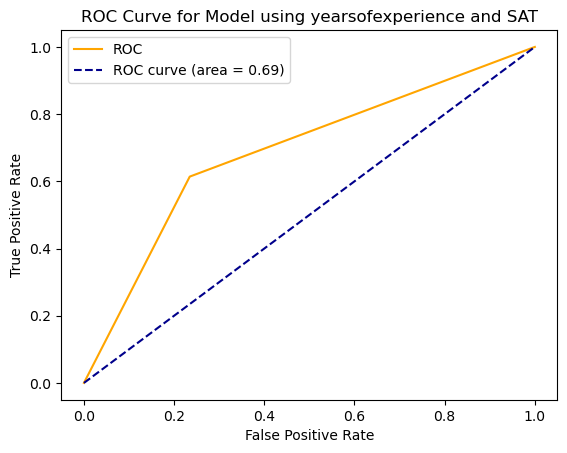

In [89]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(yTest5, yPredPay2)
auc = metrics.roc_auc_score(yTest5, yPredPay2)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model using yearsofexperience and SAT')
plt.legend()
plt.show()

# Extra Credit
## Part A
Is salary, height or age normally distributed? Does this surprise you? Why or why not?

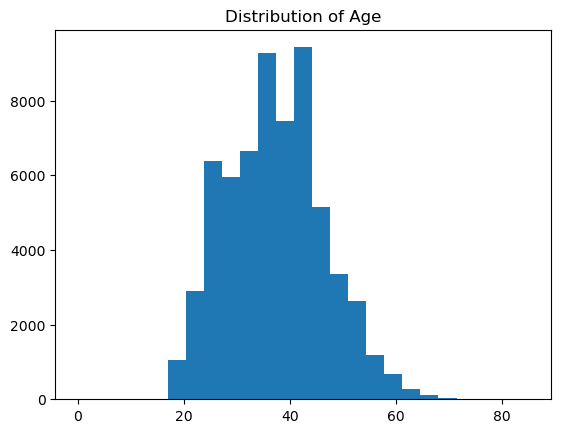

In [64]:
plt.hist(origdata['Age'], bins=25, range=[0,85])
plt.title("Distribution of Age")
plt.show()

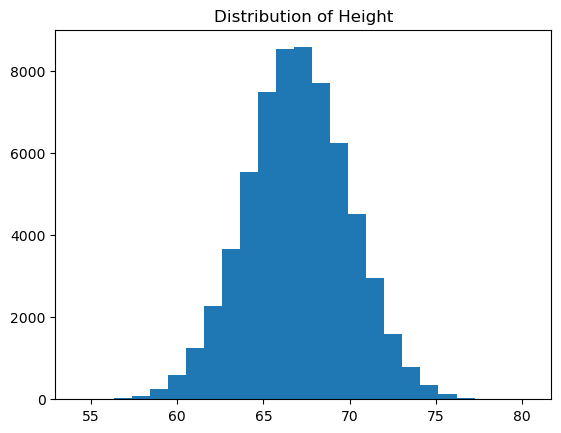

In [65]:
plt.hist(origdata['Height'], bins=25)
plt.title("Distribution of Height")
plt.show()

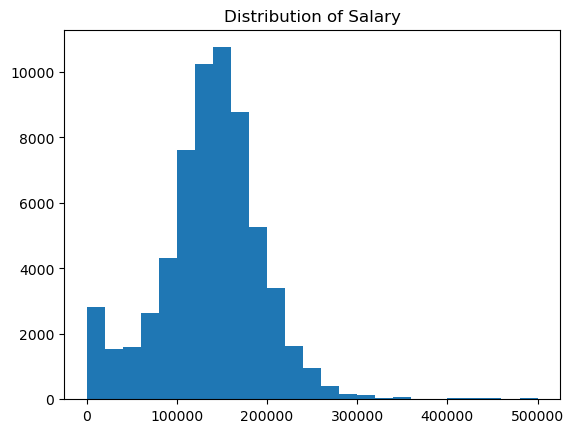

In [66]:
plt.hist(origdata['basesalary'], bins=25, range=[0,500000])
plt.title("Distribution of Salary")
plt.show()

In [67]:
# count of people with no or low salary
print("No salary:", (origdata['basesalary']==0).sum())
print("Low salary (<$20k):", (origdata['basesalary']<20000).sum())

No salary: 2304
Low salary (<$20k): 2828


/Users/erinchoi2001/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/erinchoi2001/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/erinchoi2001/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.941e+03, tolerance: 1.363e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented 